Decision Tree is a type of supervised learning algorithm that is mostly used for classification problems. This works for both categorical and continous dependent variables.

A decision tree is a graphical representation of all the possible solutions to a decision based on certain conditions.

### What is Classification?

Classification is the process of dividing the datasets into different categories of groups by adding labels.

### Types of classification - 

 - Decision Tree
 - Random Forest
 - Naive Bayes
 - KNN

## Dataset

We will be using a simple dataset to implement this algorithm. This dataset contains details of patient like Age, Sex, BP, Na_to_K and Drug column. Drug column has data as drugX, drugY, drugA, drugB and drugC. Using Decision Tree we will predict what drug to be given to the patient.

Download the dataset here.

## So let’s begin here…

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg

%matplotlib inline 

## Load Data

In [2]:
data = pd.read_csv('drug200.csv')
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


## Dependent and Independent variables

In [3]:
X = data[['Age','Sex','BP','Cholesterol','Na_to_K']].values
y = data[['Drug']].values #Dependent variable

In [4]:
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1])

le_BP = preprocessing.LabelEncoder()
le_BP.fit(['LOW','NORMAL','HIGH'])
X[:,2] = le_BP.transform(X[:,2])

le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

## Train and Test data

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Define Model

In [6]:
model = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

## Fit Model

In [7]:
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Prediction

In [8]:
predTree = model.predict(X_test)

## Accuracy

In [9]:
print("Decision Trees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

Decision Trees's Accuracy:  0.9666666666666667


## Decision Tree

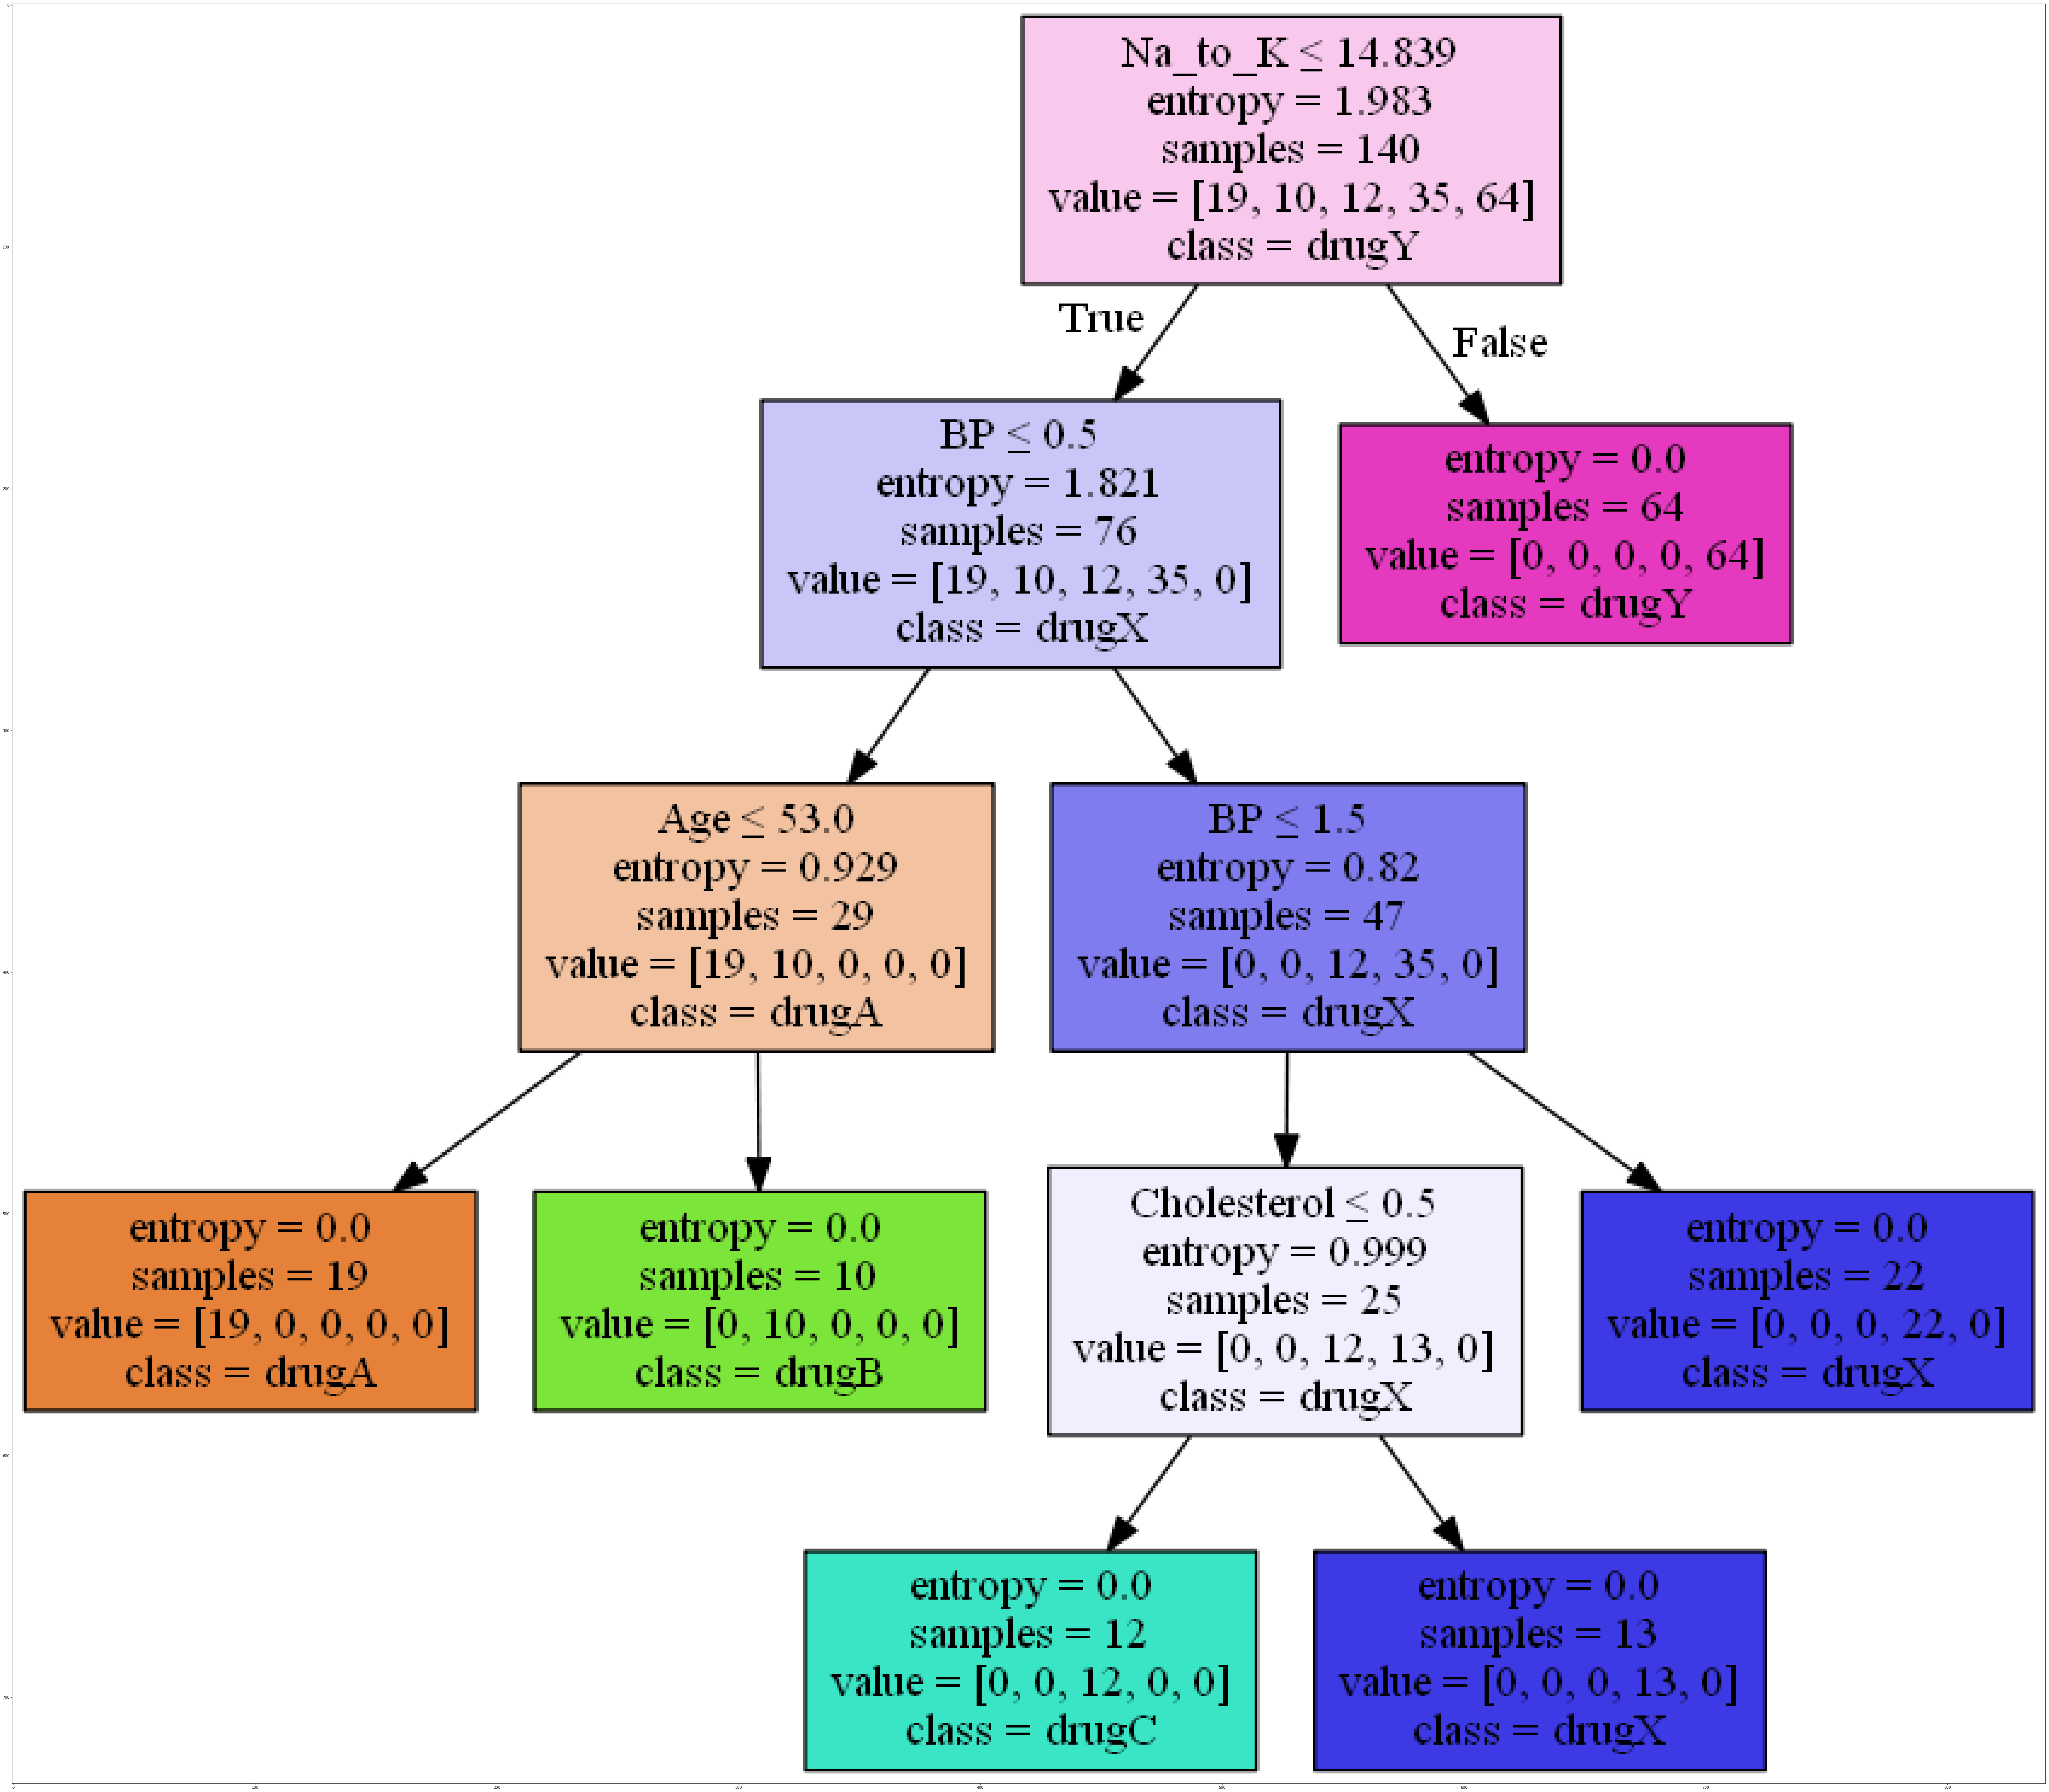

In [10]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = data.columns[0:5]
targetNames = data["Drug"].unique().tolist()
out=tree.export_graphviz(model,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

If the relationship between dependent and independent variable is well approximated by a linear model then linear regression will outperform tree based model.

If there is high non linearity and complex relationship between dependent and independent variables a tree model will outperform a classical regression model.